**IMPORTACIÓN DE PAQUETES**

**Utilidad de paquetes**
* El paquete 'sys' es útil para acceder a argumentos de línea de comandos, interacción con el intérprete y realizar operaciones específicas del sistema.
* El paquete 'warnings' te permite controlar cómo se manejan estas advertencias, como mostrarlas como excepciones, ignorarlas, mostrarlas una sola vez, etc.

**Función de códigos**
1. *import sys:* Importa el paquete 'sys'
2. *import warnings:* Importa el paquete 'warnings'
3. *if not sys.warnoptions:warnings.simplefilter('ignore')*:
      
      Verifica si la lista 'sys.warnoptions' está vacía o no tiene elementos. Si la lista 'sys.warnoptions' está vacía, entonces se establecerá un filtro de advertencia global que ignora todas las advertencias emitidas por el módulo 'warnings'.

  





In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

**Utilidad de paquetes**

* 'TensorFlow'es popular para el aprendizaje automático y la inteligencia artificial.
* 'NumPy' es ampliamente utilizado para realizar operaciones numéricas eficientes.
* 'Matplotlib' se usa combinado para crear visualizaciones y gráficos.
* 'Seaborn' se utiliza para mejorar la apariencia de las visualizaciones creadas con Matplotlib.
* 'Pandas' es ampliamente utilizado para la manipulación y análisis de datos.
* 'MinMaxScaler' es una herramienta para escalar los valores de características en un rango específico, como [0, 1].
* Las clases 'datetime' y 'timedelta' se utilizan para trabajar con fechas y horas.
* 'TQDM' se utiliza para mostrar barras de progreso al iterar sobre bucles

**Función de códigos**
1. *import tensorflow as tf:* Importa la biblioteca 'TensorFlow' y la apoda como 'tf'.
2. *import numpy as np:* Importa la biblioteca 'NumPy' y la apoda como 'np'.
3. *import matplotlib.pyplot as plt*: Importala biblioteca 'Matplotlib' y la apoda como 'plt'.
4. *import seaborn as sns:* Importa la biblioteca 'Seaborn' y la apoda como 'sns'.
5. *import pandas as pd:* Importa la biblioteca 'Pandas' y la apoda como 'pd'.
6. *from sklearn.preprocessing import MinMaxScaler:* Importa la clase 'MinMaxScaler' desde la biblioteca scikit-learn (sklearn).
7. *from datetime import datetime:* Importa la clase 'dateime'desde la biblioteca estándar de Python..
8. *from datetime import timedelta:* Importa la clase 'timedelta'desde la biblioteca estándar de Python.
9. *from tqdm import tqdm:* Importa la función 'tqdm' de la biblioteca TQDM.
10. *sns.set():* Configura los parámetros de estilos predeterminados de Seaborn para mejorar la apariencia de las visualizaciones.
11. *tf.compat.v1.random.set_random_seed(1234):* Establece una semilla para la generación de números aleatorios en TensorFlow.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

El periodo es de 1 año:

*   Fuente: https://finance.yahoo.com/quote/GOOG/history?p=GOOG
*   Página: yahoo!finance
*   Data: Alphabet Inc. (GOOG) NasdaqGS - NasdaqGS Real Time Price. Currency in USD




**Función de códigos**

1. *df = pd.read_csv('/content/drive/MyDrive/EconometríaIII_DeepLearning/GOOG.csv'):*

      Carga los datos de un archivo CSV (GOOG) en un DataFrame de Pandas.
2. d*f.head():*

      Visualización de las primeras 5 filas del DataFrame, lo que proporciona una vista previa de los datos cargados desde el archivo CSV.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/EconometríaIII_DeepLearning/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
1,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
3,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


**Función de códigos**

1. *minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')):*

      Crea una instancia de 'MinMaxScaler' y la ajusta a los datos contenidos en la columna de índice 4 a 5  del DataFrame df. Además, se convierten los datos a tipo de datos de punto flotante ('float32') antes de realizar el ajuste del escalera mecánica.

2. *df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')):*

      Se utiliza el objeto 'minmax' que fue configurado previamente para transformar los datos en las mismas columnas (índices 4 a 5) del DataFrame dfutilizando la escala mínima-máx. Además, los datos transformados se almacenan en un nuevo DataFrame llamado 'df_log'.

3. *df_log = pd.DataFrame(df_log):*

      El resultado de la transformación se convierte nuevamente en un DataFrame de Pandas, asignando el resultado a la variable 'df_log.

4. *df_log.head():*

      Visualización de las primeras 5 filas de 'df_log'

In [7]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.297028
1,0.307507
2,0.288610
3,0.292733
4,0.309054


#**Tren dividido y prueba**
Cortaré el conjunto de datos para entrenar y probar conjuntos de datos,


*   Conjunto de datos de tren derivado de la marca de tiempo inicial hasta los últimos 30 días
*   Conjunto de datos de prueba derivado de los últimos 30 días hasta el final del conjunto de datos

Entonces, dejaremos que el modelo haga pronósticos basados ​​en los últimos 30 días y repetiremos el experimento 10 veces. Puede aumentarlo localmente si lo desea, y ajustar los parámetros le ayudará mucho.

**Función de códigos**

1. *test_size = 30*

      Establece la variable 'test_size' en 30. Esta variable se utiliza para indicar cuántas filas se deben reservar para el conjunto de prueba.
2. *simulation_size = 10*

      Define la variable simulation_sizecon el valor de 10. Esta variable podría representar el tamaño de la simulación que se está realizando.
3. *df_train = df_log.iloc[:-test_size]*

      Crea un DataFrame 'df_train' que contiene todas las filas 'df_log' excepto las últimas 'test_size' filas. Esto significa que df_traincontiene la mayoría de los datos y se usará para entrenar el modelo.
4. *df_test = df_log.iloc[-test_size:]*

      Crea un DataFrame 'df_test' que contiene las últimas 'test_size' filas de 'df_log'. Este conjunto de datos se utilizará para probar la precisión y el rendimiento del modelo después de haber sido entrenado con los datos de 'df_train'.

In [8]:
test_size = 30
simulation_size = 10
df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]

Los argumentos se encargan de definir a las variables con valores específicos para configurar un modelo de aprendizaje automático.

**Función de códigos**

1. **num_layers = 2**
Define el número de capas ocultas en el modelo (2 en este caso).

2. **size_layer = 128**
Define el Número de neuronas en cada capa oculta (128).

3. **timestamp = 5**
Define el Número de pasos de tiempo en una secuencia temporal.

4. **epoch = 300**
Define la Cantidad de épocas de entrenamiento (300).

5. **dropout_rate = 0.2**
Define la tasa de dropout para la regularización (0.2).

6. **future_day = test_size**
Define la Cantidad de días en el futuro considerados en la predicción.

7. **learning_rate = 0.01**
Define la Tasa de aprendizaje del modelo (0.01).

In [9]:
num_layers = 2
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.2
future_day = test_size
learning_rate = 0.01

## **Función calculate_accuracy**

La función calculate_accuracy se utiliza para calcular la precisión de las predicciones de un modelo en comparación con los valores reales.

Función de códigos

1. def calculate_accuracy(real, predict):

  Define la precisión de las predicciones

2. real = np.array(real) + 1
    predict = np.array(predict) + 1

  Ajusta los valores sumando 1 para evitar divisiones por cero

3.     percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))

  Calcula el error cuadrático relativo entre real y predict

4.   return percentage * 100

 Expresa la precisión en forma de porcentaje y la retorna


In [10]:

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

**Función anchor**

La función *anchor* se utiliza para aplicar un suavizado exponencial a una serie de datos representada por la lista *signal*. El suavizado exponencial es útil para reducir el ruido en los datos y resaltar tendencias a largo plazo.


Función de los códigos
1. def calculate_accuracy(real, predict):

Se utilizar la función para calcular la precisión de las predicciones

2. real = np.array(real) + 1
    predict = np.array(predict) + 1

Se utilizar para calcular la precisión de las predicciones

3. percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))

Se calcula el error cuadrático relativo entre real y predict

4. return percentage * 100

Expresa la precisión en forma de porcentaje


In [11]:
def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

**Función create_model**

La función create_model crea y devuelve un modelo de red neuronal utilizando la biblioteca Keras. Este modelo está diseñado para tareas de regresión y es altamente configurable. A continuación, se resumen sus pasos clave:

**Función de códigos**
1. def create_model(input_shape, output_shape):

  Crea un modelo de red neuronal

2.  inputs = Input(shape=(input_shape,))
    x = inputs

  Define la capa de entrada

3. for _ in range(num_layers):
    
    x = Dense(size_layer, activation='relu')(x)  # Capa densa con activación ReLU
    
    x = Dropout(dropout_rate)(x)  # Capa de dropout para regularización

  Se  encarga de agregar capas ocultas y dropout

4. outputs = Dense(output_shape)(x)

  Define la capa de salida

5. return Model(inputs=inputs, outputs=outputs)

  Se encarga de crear el modelo especificando las capas de entrada y salida

In [12]:
def create_model(input_shape, output_shape):
    inputs = Input(shape=(input_shape,))
    x = inputs
    for _ in range(num_layers):
        x = Dense(size_layer, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
    outputs = Dense(output_shape)(x)
    return Model(inputs=inputs, outputs=outputs)


**Función def forecast:  **
En Python define una función llamada "forecast" (pronóstico, en español). Las funciones en Python son bloques de código que se pueden llamar para realizar una tarea específica. Cuando defines una función como forecast(), estás creando un bloque de código que se ejecutará cuando llames a la función "forecast".

**Función de códigos:**

1. date_ori = pd.to_datetime(df.iloc[:, 0]).tolist():

  Convierte una columna de fechas del DataFrame df en una lista de objetos de fecha y hora utilizando la biblioteca Pandas.

2. Loop principal for i in pbar::

  Realiza el entrenamiento del modelo en lotes y registra la pérdida media durante el proceso de entrenamiento.

3. output_predict = ...:

  Inicializa una matriz output_predict para almacenar las predicciones del modelo.

4. output_predict = minmax.inverse_transform(output_predict):

    Invierte una transformación previa (normalización) aplicada a las predicciones para recuperar los valores originales.

5. deep_future = anchor(output_predict[:, 0], 0.3):

  Aplica una función llamada "anchor" a las predicciones para obtener una proyección futura, quizás relacionada con el precio de algo.

6. return deep_future[-test_size:]:

  Retorna solo las últimas test_size predicciones del resultado obtenido, que podrían ser utilizadas para evaluar el rendimiento del modelo en un conjunto de prueba.






In [13]:
def forecast():
    modelnn = create_model(df_log.shape[1], df_log.shape[1])
    modelnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_squared_error')

    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc='train loop')
    for i in pbar:
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = df_train.iloc[k:index, :].values
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            loss = modelnn.train_on_batch(batch_x, batch_y)
            total_loss.append(loss)
        pbar.set_postfix(cost=np.mean(total_loss))

    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits = modelnn.predict(df_train.iloc[k:k+timestamp, :].values)
        output_predict[k+1:k+timestamp+1] = out_logits

    if df_train.shape[0] % timestamp != 0:
        out_logits = modelnn.predict(df_train.iloc[-timestamp:, :].values)
        output_predict[-timestamp:] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days=1))

    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits = modelnn.predict(o)
        output_predict[-future_day + i] = out_logits[0]

    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    return deep_future[-test_size:]

**Función de códigos: **
1. simulation_size = 10:

  En esta línea, se establece el valor de la variable simulation_size en 10. Esta variable podría utilizarse para controlar el tamaño de una simulación o un conjunto de repeticiones de un proceso específico. Por ejemplo, podría usarse para indicar cuántas veces se debe ejecutar una simulación o cuántas iteraciones se realizarán en un experimento.

2. results = []:

  Aquí, se inicializa la variable results como una lista vacía. Normalmente, esta variable se utilizaría para almacenar resultados o datos generados durante la simulación o el proceso. A medida que la simulación o el proceso avance, se podrían agregar resultados o datos a esta lista para su posterior análisis o visualización.


In [1]:
# Define tu tamaño de simulación
simulation_size = 10
results = []

**Función de códigos:**
1. for i in range(simulation_size)::

  Este bucle for itera simulation_size veces, donde simulation_size es el número que has definido previamente (en tu caso, 10). Esto significa que el bloque de código que sigue a continuación se ejecutará 10 veces en total.

2. print('simulation %d' % (i + 1)):

  En cada iteración del bucle, se imprime un mensaje que indica la simulación actual. El valor de i se incrementa en 1 para mostrar el número de la simulación actual (comenzando desde 1 en lugar de 0 debido a la suma de 1). Esto es útil para rastrear en qué iteración te encuentras.

3. results.append(forecast()):

  En cada iteración, se llama a la función forecast() (que debe haber sido definida previamente en tu código) para realizar una simulación o cálculo específico. El resultado de esta simulación se agrega a la lista results utilizando el método append(). Esto permite que los resultados de cada simulación se almacenen en la lista para su posterior análisis o procesamiento.

In [ ]:
# Ejecuta las simulaciones
for i in range(simulation_size):
    print('simulation %d' % (i + 1))
    results.append(forecast())




simulation 1


train loop: 100%|██████████| 300/300 [02:00<00:00,  2.49it/s, cost=0.077]

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 20ms/step
simulation 2


train loop: 100%|██████████| 300/300 [01:40<00:00,  3.00it/s, cost=0.0177]

1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 22ms/step
simulation 3


train loop: 100%|██████████| 300/300 [01:40<00:00,  3.00it/s, cost=0.0117]

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step
simulation 4


train loop: 100%|██████████| 300/300 [01:37<00:00,  3.08it/s, cost=0.077]

1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 19ms/step
simulation 5


train loop: 100%|██████████| 300/300 [01:36<00:00,  3.12it/s, cost=0.0135]

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step
simulation 6


train loop: 100%|██████████| 300/300 [01:36<00:00,  3.11it/s, cost=0.0112]

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 36ms/step
simulation 7


train loop: 100%|██████████| 300/300 [01:55<00:00,  2.61it/s, cost=0.0166]

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step
simulation 8


train loop: 100%|██████████| 300/300 [01:40<00:00,  3.00it/s, cost=0.00761]

1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 23ms/step
simulation 9


train loop: 100%|██████████| 300/300 [01:45<00:00,  2.85it/s, cost=0.0156]

1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 23ms/step
simulation 10


train loop: 100%|██████████| 300/300 [01:31<00:00,  3.28it/s, cost=0.0126]

1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 21ms/step


**Función de código:**
1. accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) if r is not None else 0 for r in results]:

  En esta línea, se calcula la precisión de las predicciones en relación con los valores reales. Para cada elemento r en la lista results, se llama a una función calculate_accuracy (que debe haber sido definida previamente en tu código) para calcular la precisión de las predicciones. Si r es None, se asume una precisión de 0. Los resultados de precisión se almacenan en la lista accuracies.

2. plt.figure(figsize=(15, 5)):

  Se crea una figura de Matplotlib para crear un gráfico con una anchura de 15 unidades y una altura de 5 unidades.

3. for no, r in enumerate(results)::

  Se inicia un bucle que itera a través de los elementos de la lista results. La variable no lleva un seguimiento del índice actual en el bucle, y r es el resultado de una simulación.

4. if r is not None::

  Se verifica si el resultado r no es None. Si es así, se procede a graficar las predicciones correspondientes.

5. plt.plot(r, label='Pronóstico %d' % (no + 1)):

  Se dibuja la serie de tiempo de las predicciones r en el gráfico. Se etiqueta cada serie con un nombre que incluye el número de pronóstico actual.

6. plt.plot(df['Close'].iloc[-test_size:].values, label='true trend', c='black'):

  También se grafica la serie de tiempo real de los valores reales (el "verdadero" valor) en el gráfico en color negro. Esto se hace para comparar las predicciones con los valores reales.

7. plt.legend():

  Se agrega una leyenda al gráfico para indicar qué línea corresponde a cada serie de datos.

8. plt.title('Precisión promedio: %.4f' % (np.mean(accuracies))):

  Se agrega un título al gráfico que muestra la precisión promedio de las predicciones. La precisión promedio se calcula tomando la media de los valores en la lista accuracies.

9. plt.show():

  Finalmente, se muestra el gráfico en una ventana o se guarda en un archivo, dependiendo de cómo tengas configurada tu interfaz de Matplotlib.

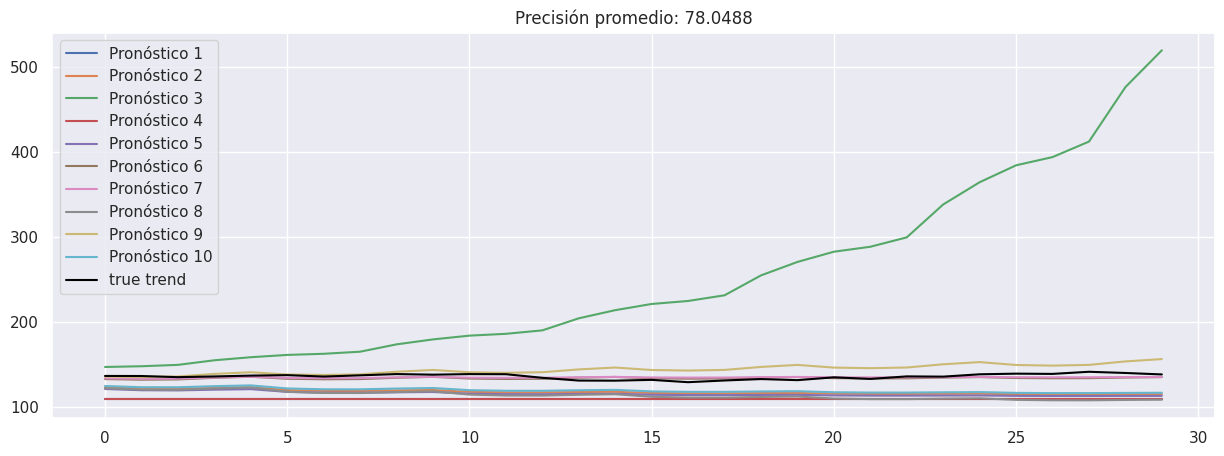

In [ ]:
accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) if r is not None else 0 for r in results]

plt.figure(figsize=(15, 5))
for no, r in enumerate(results):
    if r is not None:
        plt.plot(r, label='Pronóstico %d' % (no + 1))
plt.plot(df['Close'].iloc[-test_size:].values, label='true trend', c='black')
plt.legend()
plt.title('Precisión promedio: %.4f' % (np.mean(accuracies)))
plt.show()